In [15]:
import pandas as pd

from id_signaling.figures import covert_churlish_regression, plot_evolution, heatmap

## Disliking penalty-homophily experiment

In [11]:
df = pd.read_csv('data/disliking.csv')

df.columns
df_r = df.rename(columns={'dislike_penalty': 'disliking'})
# covert_churlish_regression(df_r, [0.05, 0.2, 0.3, 0.4], [0.25], experiment='disliking')

Index(['dislike_penalty', 'homophily', 'prop_churlish', 'prop_covert',
       'timestep', 'trial_idx'],
      dtype='object')

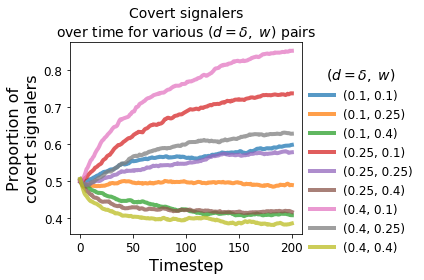

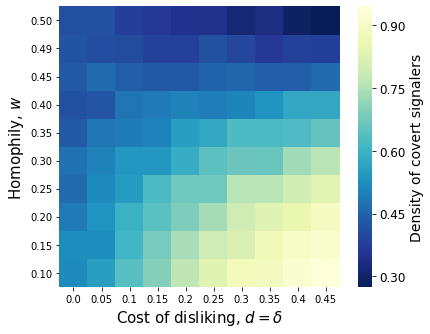

In [16]:
plot_evolution(df_r, experiment='disliking')
heatmap(df_r, experiment='disliking')

### Evolution of churlishness

In [ ]:
df.head()

In [ ]:
gb_mean = df.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_churlish'].mean()

means = gb_mean.unstack(level=(0,1))

means.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='($d=\delta$, w)',
            borderaxespad=0, frameon=False, prop={'size': 12})
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n($d=\delta$, w) pairs', size=14)

In [ ]:
homophilies = [0.1, 0.25, 0.4]
dislike_penalties = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.dislike_penalty.isin(dislike_penalties)]

gb_mean_lim = df_lim.groupby(['dislike_penalty', 'homophily', 'timestep']
                     )['prop_churlish'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(d=\delta, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Churlish receivers over time for various\n$(d=\delta, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/dislikingHomophilyChurlishSeries.pdf')

In [ ]:
gb_mean = df.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_churlish'].mean()

means = gb_mean.unstack(level=(0,1))

final_means = means[means.index == 200]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of churlish receivers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Cost of disliking $d=\delta$', size=15)


# relative_receptivity = df.receptivity.unique() / 0.5
# relative_receptivity.sort()
# ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/churlishDensityVsDislikingHomophilyCoevo.pdf'
)

### Evolution of covert signaling

In [ ]:
homophilies = [0.1, 0.25, 0.4]
dislike_penalties = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.dislike_penalty.isin(dislike_penalties)]

gb_mean_lim = df_lim.groupby(['dislike_penalty', 'homophily', 'timestep']
                     )['prop_covert'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(d=\delta, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n$(d=\delta, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/dislikingHomophilyCovertSeries.pdf')

In [ ]:
gb_mean = df.groupby(
    ['dislike_penalty', 'homophily', 'timestep']
)['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

final_means = means[means.index == 200]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Cost of disliking $d=\delta$', size=15)


# relative_receptivity = df.receptivity.unique() / 0.5
# relative_receptivity.sort()
# ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/covertDensityVsDislikingHomophilyCoevo.pdf'
)

## Covert receptivity-homophily experiment

In [ ]:
df = pd.read_csv('data/receptivity.csv')

### Evolution of churlishness

In [ ]:
homophilies = [0.1, 0.25, 0.4]
receptivities = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.receptivity.isin(receptivities)]
df_lim['receptivity'] = df_lim.receptivity / 0.5  

gb_mean_lim = df_lim.groupby(['receptivity', 'homophily', 'timestep']
                     )['prop_churlish'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(r/R, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Churlish receivers over time for various\n$(r/R, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/receptivityHomophilyChurlishSeries.pdf')

In [ ]:
gb_mean = df.groupby(
    ['receptivity', 'homophily', 'timestep']
)['prop_churlish'].mean()

means = gb_mean.unstack(level=(0,1))

final_means = means[means.index == 200]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of churlish receivers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Relative covert receptivity, $r/R$', size=15)


relative_receptivity = df.receptivity.unique() / 0.5
relative_receptivity.sort()
ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/churlishDensityVsReceptivityHomophilyCoevo.pdf'
)

### Evolution of covert signaling

In [ ]:
homophilies = [0.1, 0.25, 0.4]
receptivities = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) 
            & df.receptivity.isin(receptivities)]
df_lim['receptivity'] = df_lim.receptivity / 0.5  
gb_mean_lim = df_lim.groupby(['receptivity', 'homophily', 'timestep']
                     )['prop_covert'].mean()

means_lim = gb_mean_lim.unstack(level=(0,1))

means_lim.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='$(r/R, w)$',
            borderaxespad=0, frameon=False, prop={'size': 12})

plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n$(r/R, w)$ pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/receptivityHomophilyCovertSeries.pdf')

In [ ]:
gb_mean = df.groupby(
    ['receptivity', 'homophily', 'timestep']
)['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

final_means = means[means.index == means.index[-1]]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Relative covert receptivity, $r/R$', size=15)


relative_receptivity = df.receptivity.unique() / 0.5
relative_receptivity.sort()
ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)]);

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/covertDensityVsReceptivityHomophilyCoevo.pdf'
)

In [8]:
from id_signaling.figures import heatmap, plot_evolution

Index(['homophily', 'prop_churlish', 'prop_covert', 'receptivity', 'timestep',
       'trial_idx'],
      dtype='object')


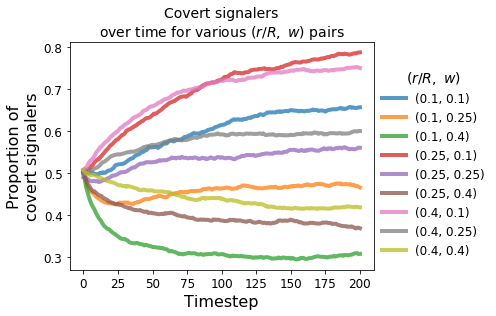

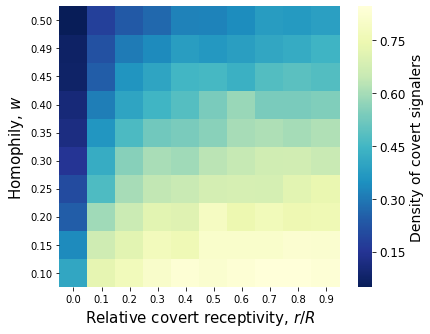

In [10]:
df = pd.read_csv('data/receptivity.csv')
print(df.columns)
plot_evolution(df, experiment='receptivity', figsize=(7, 4.5))
heatmap(df, experiment='receptivity')

In [12]:
from id_signaling.figures import covert_churlish_regression
df_rec = pd.read_csv('data/receptivity.csv')
df_dis = pd.read_csv('data/disliking.csv')

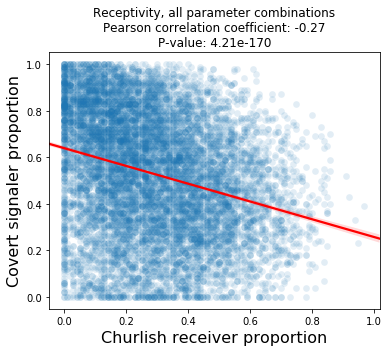

In [13]:
covert_churlish_regression(df_rec, figsize=(5.5, 5), savefig_path='reports/Figures/receptivity_allcombos_reg.pdf')

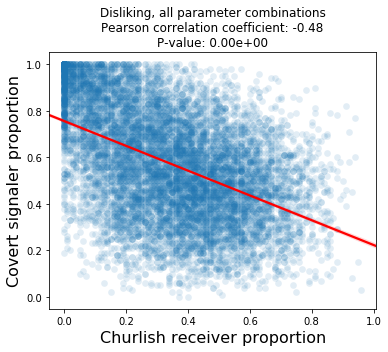

In [14]:
df_r = df_dis.rename(columns={'dislike_penalty': 'disliking'})
covert_churlish_regression(df_r, experiment='disliking', 
                           figsize=(5.5, 5), 
                           savefig_path='reports/Figures/disliking_allcombos_reg.pdf')